# MuML Labor 2 - Segmentierung und Merkmalsextraktion


## 4.4.1 Teilaufgabe Vorverarbeitung

Anwendung der Vorverarbeitungsschritte aus Labor 1 auf jedes der Bilder im Ordner images
1. get_roi: Berandung entfernen
2. discarc_busbars: Busbars entfernen
3. contrast_stretching: Grauwertspreizung auf 0 ... 255
4. smoothing: Glättung mit Gauss-Kernel der Größe 5

Die zugehörigen Dateinamen werden in ```image_names``` gespeichert, die Bilder zunächst in einer Liste ```image_list``` und anschließend angezeigt und in ein numpy array ```images``` überführt.

Processing image:  000_ok.jpg
Processing image:  001_disconnectedarea_crack_shunt.jpg
Processing image:  002_printingdefect_crack_finger.jpg
Processing image:  003_disconnectedarea_printingdefect_crack.jpg
Processing image:  004_conveyor.jpg
Processing image:  005_crack.jpg
Processing image:  006_crack_printingdefect.jpg
Processing image:  007_printingdefect.jpg
Processing image:  008_finger.jpg
Dimensions of array images: (9, 695, 850)


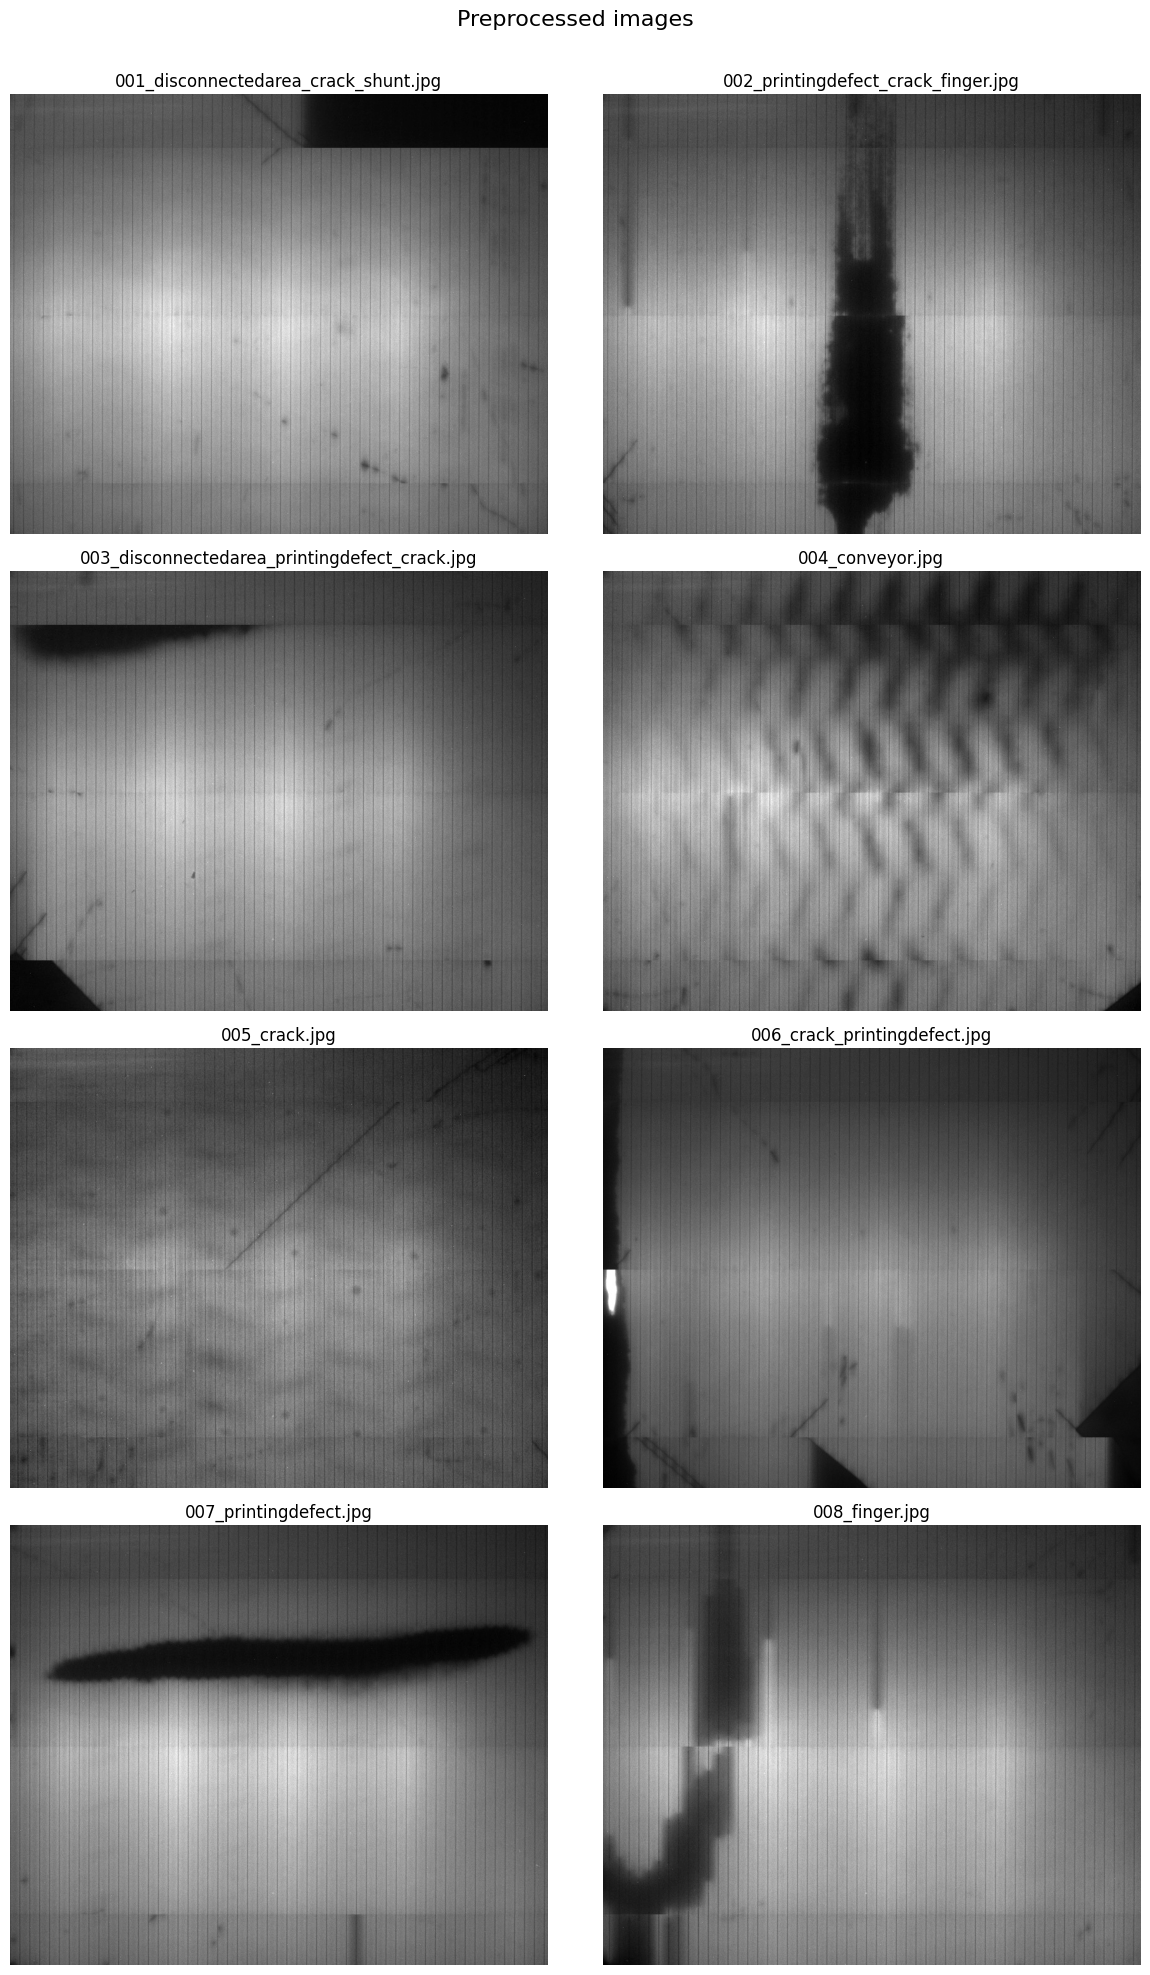

In [1]:
""" Preprocessing of the images for Lab 2
    - eliminate black borders and diagonal edges
    - discard busbars
    - apply contrast stretching
    - apply smoothing

    input: images in the folder images
    output: images after preprocessing as numpy array

    @Author: Joerg Dahlkemper
    @Date: 2024-04-21
"""

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time
import timeit

IMAGE_PATH = "../images"
LIMITS = [70, 50, 900, 900]
BAR_HEIGHT = 45
BAR_POSITIONS = [85, 395, 705]


def get_roi(img, row1, col1, row2, col2):
    """ eliminate black borders and diagonal edges from the image"""
    return img[row1:row2, col1:col2]


def discard_busbars(img, bar_height, positions):
    """ discard busbars from the image"""
    height, width = img.shape
    count_bars = len(positions)

    img_discarded_bars = img.copy()

    # apply numpy delete in a loop to remove the busbars
    for step, position in enumerate(positions):
        img_discarded_bars = np.delete(img_discarded_bars, 
            np.arange(position - step * bar_height, position + (1 - step) * bar_height), axis=0)

    return img_discarded_bars


def contrast_stretching(img):
    """ apply contrast stretching to the image"""
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

def smoothing(img, kernel_size):
    """ apply a Gauss filter to the image"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


# iterate over all images in the folder
image_names = []

for filename in os.listdir(IMAGE_PATH):
    if filename.endswith(".jpg") and filename.startswith("00"):
        image_names.append(filename)
image_names.sort()

image_list = []

for filename in image_names:
    print("Processing image: ", filename)
    img = cv2.imread(os.path.join(IMAGE_PATH, filename), cv2.IMREAD_GRAYSCALE)
    img = get_roi(img, *LIMITS)
    img = discard_busbars(img, BAR_HEIGHT, BAR_POSITIONS)
    img = contrast_stretching(img)
    # img = smoothing(img, 5)
    image_list.append(img)

images = np.array(image_list)
print("Dimensions of array images:", images.shape)

def plot_images(images, image_names, suptitle):
    # plot the images, two per row with the image name as title and a super title
    fig = plt.figure(figsize=(12, 24))

    for i, image_name in enumerate(image_names):
        plt.subplot(len(image_names)//2 + 1, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(image_name)
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(suptitle, fontsize=16, y=1.02)
    plt.show()

plot_images(images[1:], image_names[1:], "Preprocessed images")
